In [1]:
%run "E:\Users\puzheng\Documents\Startup_py3.py"
sys.path.append(r"E:\Users\puzheng\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

25328


# 0. required packages for h5py

In [2]:
import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

# 1. Create field-of-view class

In [3]:
reload(ia)
reload(classes)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)

reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)

fov_param = {'data_folder':r'\\10.245.74.158\Chromatin_NAS_5\20201127-NOAcr_CTP-08_E14_brain_no_clearing\After_clearing',
             'save_folder':r'D:\Pu_Temp\20201127_IgH_P-brain\after_clearing',
             #'save_folder':r'D:\Pu_Temp\202009_IgH_proB_DMSO_2color',
             'experiment_type': 'DNA',
             'num_threads': 12,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20201204-Corrections_3color_50',
             'shared_parameters':{
                     'single_im_size':[50,2048,2048],
                     'corr_channels':['750','647','561'],
                     'num_empty_frames': 0, 
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'min_num_seeds':500,
                     'max_num_seeds': 2500,
                     'spot_seeding_th':150,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                 },             
             }

In [4]:
sel_fov_id = 6
fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=sel_fov_id,
                                          _color_info_kwargs={
                                              '_color_filename':'Color_Usage',
                                          }, 
                                          _prioritize_saved_attrs=False,
                                          )

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 14
- Number of field of views: 60
- Importing csv file: \\10.245.74.158\Chromatin_NAS_5\20201127-NOAcr_CTP-08_E14_brain_no_clearing\After_clearing\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
-- Hyb H0R0 exists in this data
-- DAPI exists in hyb: H0R0
- 14 folders are found according to color-usage annotation.
+ loading fov_info from file: D:\Pu_Temp\20201127_IgH_P-brain\after_clearing\Conv_zscan_06.hdf5
++ base attributes loaded:['chrom_im', 'ref_im'] in 5.672s.
+ loading correction from file: D:\Pu_Temp\20201127_IgH_P-brain\after_clearing\Conv_zscan_06.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: D:\Pu_Temp\20201127_IgH_P-brain\after_clearin

## 2. Process image into candidate spots

In [6]:
reload(io_tools.load)
reload(spot_tools.fitting)
reload(correction_tools.chromatic)
reload(classes.batch_functions)

# process image into spots
id_list, spot_list = fov._process_image_to_spots('unique', 
                                                 #_sel_ids=np.arange(41,47),
                                                 _load_common_reference=True,
                                                 _load_with_multiple=False,
                                                 _save_images=True,
                                                 _warp_images=False, 
                                                 _overwrite_drift=True,
                                                 _overwrite_image=False,
                                                 _overwrite_spot=False,
                                                 _verbose=True)

-- No folder selected, allow processing all 14 folders
-- checking unique, region:[41 42] in 0.003s.
-- checking unique, region:[66 67] in 0.004s.
-- checking unique, region:[69 70] in 0.003s.
-- checking unique, region:[72 73] in 0.003s.
-- checking unique, region:[75 76] in 0.003s.
-- checking unique, region:[78 79] in 0.003s.
-- checking unique, region:[81 82] in 0.003s.
-- checking unique, region:[ 99 100] in 0.003s.
-- checking unique, region:[102 103] in 0.003s.
-- checking unique, region:[105 106] in 0.003s.
-- checking unique, region:[108 109] in 0.000s.
-- checking unique, region:[111 112] in 0.000s.


# 3. Find chromosomes

## 3.1 load chromosome image

In [7]:
chrom_im = fov._load_chromosome_image(_type='forward', _overwrite=False)

directly return existing attribute.


<IPython.core.display.Javascript object>


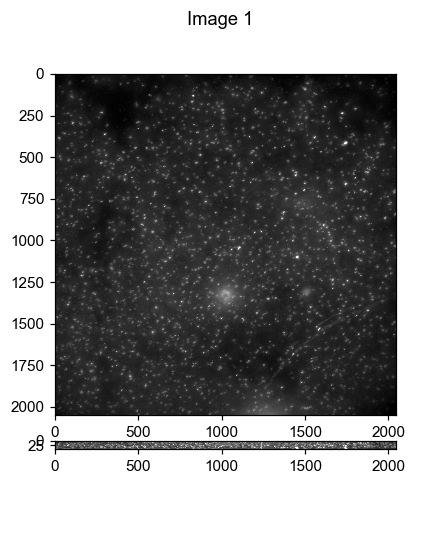

In [8]:
%matplotlib notebook
# visualize chromsome image:
visual_tools.imshow_mark_3d_v2([fov.chrom_im])

## 3.2 find candidate chromosomes

In [14]:
chrom_coords = fov._find_candidate_chromosomes_by_segmentation(_filt_size=4,
                                                               _binary_per_th=99., 
                                                               _morphology_size=2,
                                                               _overwrite=True)

-- adjust seed image with filter size=4
-- binarize image with threshold: 99.0%
-- erosion and dialation with size=2.
-- find close objects.
-- random walk segmentation, beta=10.
-- find objects larger than size=50
-- 980 objects are found by segmentation.
- Start multiprocessing caluclate chromosome coordinates with 20 threads in 1315.239s.
-- saving fov_info to file: D:\Pu_Temp\20201127_IgH_P-brain\after_clearing\Conv_zscan_03.hdf5
++ base attributes saved:['cand_chrom_coords'] in 0.377s.


## 3.3 select among candidate chromosomes

In [12]:
chrom_coords = fov._select_chromosome_by_candidate_spots(_good_chr_loss_th=0.5,
                                                         _cand_spot_intensity_th=0.5,
                                                         _save=True, 
                                                         _overwrite=True)

- start select from 482 chromosomes with loss threshold=0.5
-- remove chr id 0, percentage of lost rounds:0.792.
-- remove chr id 12, percentage of lost rounds:0.792.
-- remove chr id 6, percentage of lost rounds:0.667.
-- remove chr id 379, percentage of lost rounds:0.625.
-- remove chr id 309, percentage of lost rounds:0.583.
-- remove chr id 335, percentage of lost rounds:0.542.
-- 476 chromosomes are kept.
-- saving fov_info to file: D:\Pu_Temp\20201127_IgH_P-brain\after_clearing\Conv_zscan_03.hdf5
++ base attributes saved:['chrom_coords'] in 0.228s.


### visualize chromosomes selections

<IPython.core.display.Javascript object>


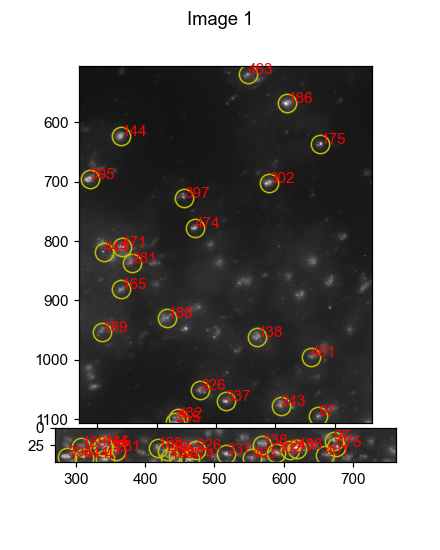

In [13]:
%matplotlib notebook
%matplotlib notebook
## visualize
coord_dict = {'coords':[np.flipud(_coord) for _coord in fov.chrom_coords],
              'class_ids':list(np.zeros(len(fov.chrom_coords),dtype=np.int)),
             }

visual_tools.imshow_mark_3d_v2([fov.chrom_im], 
                               given_dic=coord_dict,
                               save_file=None,
                               )


In [144]:
fov.color_dic

{'H0R0': ['', '', '', 'beads', 'DAPI'],
 'H1R1': ['u41', 'u42', '', 'beads'],
 'H2R2': ['u66', 'u67', '', 'beads'],
 'H3R3': ['u69', 'u70', '', 'beads'],
 'H4R4': ['u72', 'u73', '', 'beads'],
 'H5R5': ['u75', 'u76', '', 'beads'],
 'H6R6': ['u78', 'u79', '', 'beads'],
 'H7R7': ['u81', 'u82', '', 'beads'],
 'H8R8': ['u99', 'u100', '', 'beads'],
 'H9R9': ['u102', 'u103', '', 'beads'],
 'H10R10': ['u105', 'u106', '', 'beads'],
 'H11R11': ['u108', 'u109', '', 'beads'],
 'H12R12': ['u111', 'u112', '', 'beads'],
 'H13R13': ['', 'reverse_chrom', '', 'beads']}

## select spots based on chromosomes

In [136]:
fov._load_from_file('unique')

+ loading unique from file: D:\Pu_Temp\20201127_IgH_P-brain\after_clearing\Conv_zscan_03.hdf5


In [146]:
intensity_th = 0.25
from ImageAnalysis3.spot_tools.picking import assign_spots_to_chromosomes

kept_spots_list = []
for _spots in fov.unique_spots_list:
    kept_spots_list.append(_spots[_spots[:,0] > intensity_th])
# finalize candidate spots
cand_chr_spots_list = [[] for _ct in fov.chrom_coords]
for _spots in kept_spots_list:
    _cands_list = assign_spots_to_chromosomes(_spots, fov.chrom_coords)
    for _i, _cands in enumerate(_cands_list):
        cand_chr_spots_list[_i].append(_cands)
print(f"kept chromosomes: {len(fov.chrom_coords)}")

kept chromosomes: 778


In [147]:
reload(spot_tools.picking)
from ImageAnalysis3.spot_tools.picking import convert_spots_to_hzxys

dna_cand_hzxys_list = [convert_spots_to_hzxys(_spots, fov.shared_parameters['distance_zxy'])
                       for _spots in cand_chr_spots_list]
dna_reg_ids = fov.unique_ids

In [148]:
# select_hzxys close to the chromosome center
dist_th = 3000 # upper limit is 5000nm
sel_dna_cand_hzxys_list = []
for _cand_hzxys, _chrom_coord in zip(dna_cand_hzxys_list, fov.chrom_coords):
    _sel_cands_list = []
    
    for _cands in _cand_hzxys:
        if len(_cands) == 0:
            _sel_cands_list.append([])
        else:
            _dists = np.linalg.norm(_cands[:,1:4] - _chrom_coord*np.array([200,108,108]), axis=1)
            _sel_cands_list.append(_cands[_dists < dist_th])
            
    # append
    sel_dna_cand_hzxys_list.append(_sel_cands_list)

- iter:0
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 4.063s
-- collapse all regions into 1d.


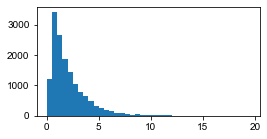

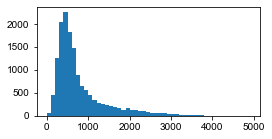

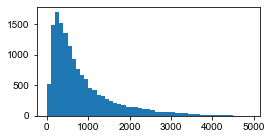

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 4.185s
-- region kept: 0.8028
- iter:1
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 3.920s
-- collapse all regions into 1d.


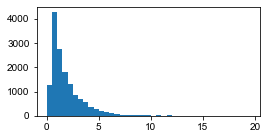

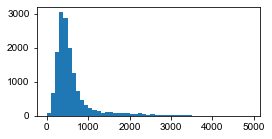

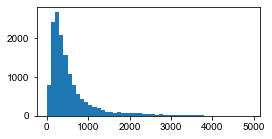

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 4.046s
-- region kept: 0.8958
- iter:2
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 3.828s
-- collapse all regions into 1d.


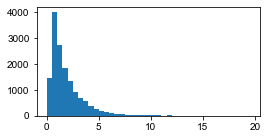

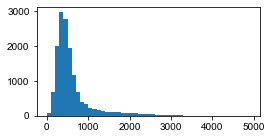

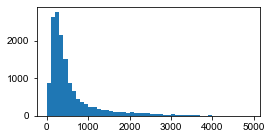

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 4.006s
-- region kept: 0.9143
- iter:3
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 3.832s
-- collapse all regions into 1d.


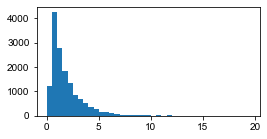

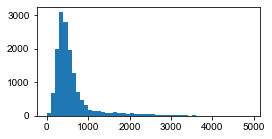

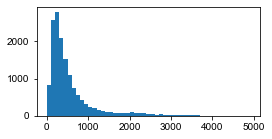

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 3.953s
-- region kept: 0.9547
- iter:4
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 3.844s
-- collapse all regions into 1d.


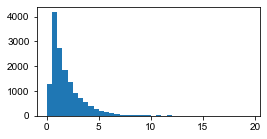

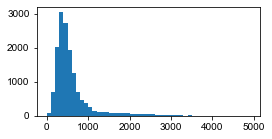

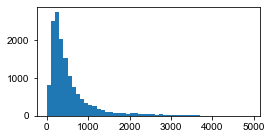

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 4.047s
-- region kept: 0.9122
- iter:5
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 3.844s
-- collapse all regions into 1d.


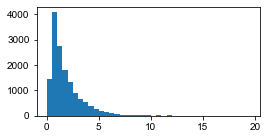

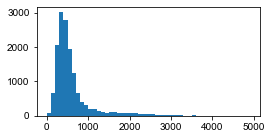

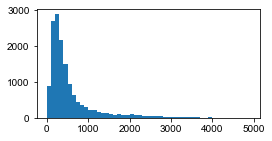

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 3.925s
-- region kept: 0.9232
- iter:6
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 3.937s
-- collapse all regions into 1d.


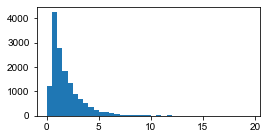

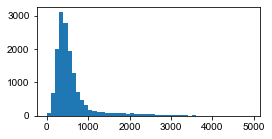

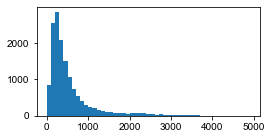

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 3.960s
-- region kept: 0.9607
- iter:7
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 3.926s
-- collapse all regions into 1d.


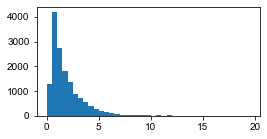

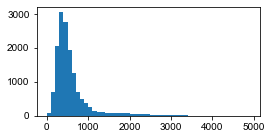

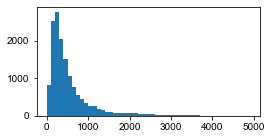

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 4.172s
-- region kept: 0.9144
- iter:8
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 3.922s
-- collapse all regions into 1d.


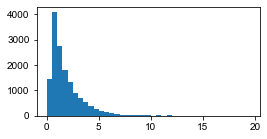

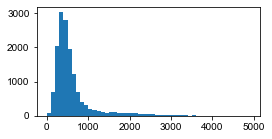

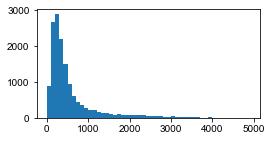

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 4.064s
-- region kept: 0.9246
- iter:9
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 3.972s
-- collapse all regions into 1d.


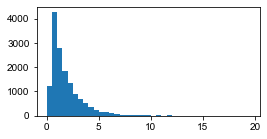

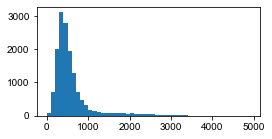

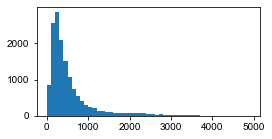

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 4.155s
-- region kept: 0.9614


In [149]:
reload(ia.spot_tools.picking)
# load functions
from ImageAnalysis3.spot_tools.picking import Pick_spots_by_intensity, EM_pick_scores_in_population, generate_reference_from_population,evaluate_differences

%matplotlib inline
niter= 10
nkeep = len(sel_dna_cand_hzxys_list)
num_threads = 12
# initialize
init_dna_hzxys = Pick_spots_by_intensity(sel_dna_cand_hzxys_list[:nkeep])
# set save list
sel_dna_hzxys_list, sel_dna_scores_list, all_dna_scores_list = [init_dna_hzxys], [], []
for _iter in range(niter):
    print(f"- iter:{_iter}")
    # generate reference
    ref_ct_dists, ref_local_dists, ref_ints = generate_reference_from_population(
        sel_dna_hzxys_list[-1], dna_reg_ids, 
        sel_dna_hzxys_list[-1][:nkeep], dna_reg_ids,
        num_threads=num_threads,
        collapse_regions=True,
    )
    plt.figure(figsize=(4,2))
    plt.hist(np.ravel(ref_ints), bins=np.arange(0,20,0.5))
    plt.figure(figsize=(4,2))
    plt.hist(np.ravel(ref_ct_dists), bins=np.arange(0,5000,100))
    plt.figure(figsize=(4,2))
    plt.hist(np.ravel(ref_local_dists), bins=np.arange(0,5000,100))
    plt.show()
    # scoring
    sel_hzxys, sel_scores, all_scores = EM_pick_scores_in_population(
            sel_dna_cand_hzxys_list[:nkeep], dna_reg_ids, sel_dna_hzxys_list[-1], 
            ref_ct_dists, ref_local_dists, ref_ints,
            sel_dna_hzxys_list[-1], dna_reg_ids, num_threads=num_threads,
        )
    update_rate = evaluate_differences(sel_hzxys, sel_dna_hzxys_list[-1])
    print(f"-- region kept: {update_rate:.4f}")
    sel_dna_hzxys_list.append(sel_hzxys)
    sel_dna_scores_list.append(sel_scores)
    all_dna_scores_list.append(all_scores)
    
    if update_rate > 0.99:
        break

In [150]:
from scipy.spatial.distance import pdist, squareform
sel_iter = -1

final_dna_hzxys_list = []
distmap_list = []
score_th = np.exp(-6)
bad_spot_percentage = 0.6
for _hzxys, _scores in zip(sel_dna_hzxys_list[sel_iter], sel_dna_scores_list[sel_iter]):
    _kept_hzxys = np.array(_hzxys).copy()
    _kept_hzxys[_scores < score_th] = np.nan
    if np.mean(np.isnan(_kept_hzxys).sum(1)>0)<bad_spot_percentage:
        final_dna_hzxys_list.append(_kept_hzxys)
        distmap_list.append(squareform(pdist(_kept_hzxys[:,1:4])))

distmap_list = np.array(distmap_list)
median_distmap = np.nanmedian(distmap_list, axis=0)

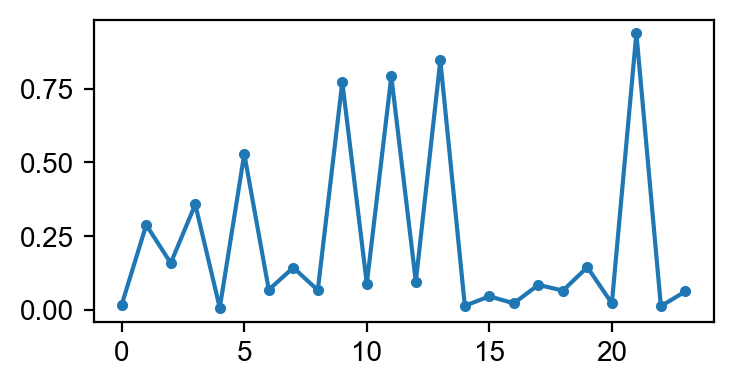

In [151]:
loss_rates = np.mean(np.sum(np.isnan(final_dna_hzxys_list), axis=2)>0, axis=0)
fig, ax = plt.subplots(figsize=(4,2),dpi=200)
ax.plot(loss_rates, '.-')
#ax.set_xticks(np.arange(0,150,20))
plt.show()

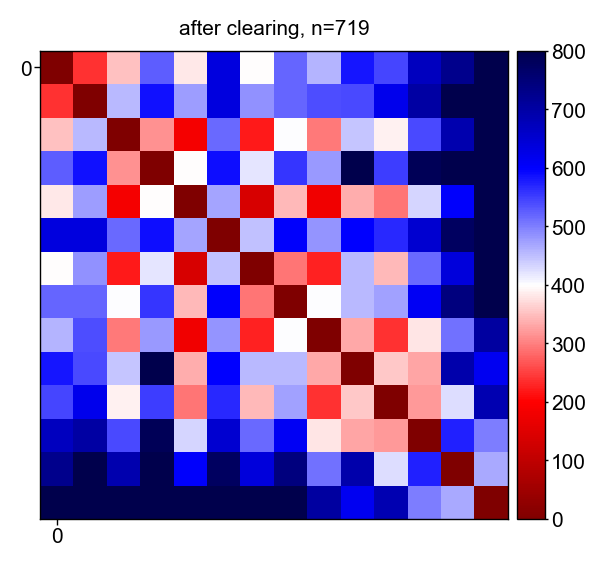

In [152]:
fig, ax = plt.subplots(figsize=(4,3),dpi=200)
ax = ia.figure_tools.distmap.plot_distance_map(#median_distmap,
                                               median_distmap[:14,:14], 
                                               color_limits=[0,800],
                                               ax=ax,
                                               ticks=np.arange(0,150,20), 
                                               figure_dpi=200)
ax.set_title(f"after clearing, n={len(distmap_list)}", fontsize=7.5)
plt.gcf().subplots_adjust(bottom=0.1)
plt.show()

In [28]:
fov.unique_ids[:14]

array([41, 42, 66, 67, 69, 70, 72, 73, 75, 76, 78, 79, 81, 82])

In [18]:
sel_fov_id

6

In [19]:
before_fov_param = {
    'data_folder':r'\\10.245.74.158\Chromatin_NAS_5\20201127-NOAcr_CTP-08_E14_brain_no_clearing\Before_clearing',
    'save_folder':r'D:\Pu_Temp\20201127_IgH_P-brain\before_clearing',
    #'save_folder':r'D:\Pu_Temp\202009_IgH_proB_DMSO_2color',
    'experiment_type': 'DNA',
    'num_threads': 12,
    'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20201204-Corrections_3color_50',
    'shared_parameters':{
         'single_im_size':[50,2048,2048],
         'corr_channels':['750','647','561'],
         'num_empty_frames': 0, 
         'corr_hot_pixel':True,
         'corr_Z_shift':False,
         'min_num_seeds':500,
         'max_num_seeds': 2500,
         'spot_seeding_th':150,
         'normalize_intensity_local':True,
         'normalize_intensity_background':False,
         },             
     }
before_fov = classes.field_of_view.Field_of_View(before_fov_param, _fov_id=sel_fov_id,
                                                 _color_info_kwargs={
                                                  '_color_filename':'Color_Usage',
                                                  }, 
                                                  _prioritize_saved_attrs=False,
                                                  )

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 8
- Number of field of views: 60
- Importing csv file: \\10.245.74.158\Chromatin_NAS_5\20201127-NOAcr_CTP-08_E14_brain_no_clearing\Before_clearing\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
-- Hyb H0R0 exists in this data
-- DAPI exists in hyb: H0R0
- 8 folders are found according to color-usage annotation.
+ loading fov_info from file: D:\Pu_Temp\20201127_IgH_P-brain\before_clearing\Conv_zscan_06.hdf5
++ base attributes loaded:['cand_chrom_coords', 'chrom_coords', 'chrom_im', 'ref_im'] in 2.298s.
+ loading correction from file: D:\Pu_Temp\20201127_IgH_P-brain\before_clearing\Conv_zscan_06.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: D:\Pu_T

## Load DAPI-image as reference

In [20]:
fov._load_dapi_image()
before_fov._load_dapi_image()

directly return existing attribute.
-- choose dapi images from folder: \\10.245.74.158\Chromatin_NAS_5\20201127-NOAcr_CTP-08_E14_brain_no_clearing\Before_clearing\H0R0.
-- choose dapi images from folder: \\10.245.74.158\Chromatin_NAS_5\20201127-NOAcr_CTP-08_E14_brain_no_clearing\Before_clearing\H0R0.
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20201127-NOAcr_CTP-08_E14_brain_no_clearing\Before_clearing\H0R0\Conv_zscan_06.dax
-- loading illumination correction profile from file:
	 405 illumination_correction_405_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_5\20201127-NOAcr_CTP-08_E14_brain_no_clearing\Before_clearing\H0R0\Conv_zscan_06.dax  in 16.017s
-- removing hot pixels for channels:['405'] in 8.973s
-- illumination correction for channels: 405, in 2.237s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 28.040s
-- saving fov_info to file: D:\Pu_Temp\20201127_IgH_P-brain\before_clearing\Conv_zscan_06.hdf5
++ base a

array([[[2033, 2041, 2096, ..., 2881, 3020, 3026],
        [2013, 1808, 1885, ..., 3041, 2875, 3082],
        [1962, 1843, 1984, ..., 3026, 3075, 3115],
        ...,
        [6876, 7265, 6672, ..., 5413, 5319, 5723],
        [6910, 6483, 6581, ..., 5330, 5179, 5429],
        [6848, 6750, 6895, ..., 5608, 5429, 5395]],

       [[1960, 1946, 1885, ..., 3035, 3402, 3103],
        [1920, 1942, 2132, ..., 3195, 3109, 3069],
        [1960, 2114, 1958, ..., 2983, 3118, 3118],
        ...,
        [6814, 7023, 6910, ..., 5756, 5504, 5611],
        [6659, 6787, 6701, ..., 5410, 5471, 5765],
        [7042, 6686, 6895, ..., 5481, 5491, 5346]],

       [[1936, 1897, 2007, ..., 3038, 3211, 2968],
        [1794, 1928, 1762, ..., 3051, 3054, 2866],
        [1642, 1853, 1976, ..., 3016, 2970, 3029],
        ...,
        [6689, 6726, 6910, ..., 5280, 5348, 5510],
        [6659, 6604, 6761, ..., 5580, 5785, 5614],
        [6784, 6686, 6831, ..., 5775, 5148, 5413]],

       ...,

       [[2766, 2555, 246

# calculate rotation matrix

In [21]:
from ImageAnalysis3 import alignment_tools
reload(alignment_tools)
experiment_folder = r'U:\20201127-NOAcr_CTP-08_E14_brain_no_clearing\Experiments'
before_position_file = os.path.join(experiment_folder, '10x_positions.txt')
after_position_file = os.path.join(experiment_folder, '10x_positions_after.txt')
R, T = alignment_tools.align_manual_points(before_position_file, after_position_file, save=False)

- Manually picked points aligned, rotation:
[[ 0.99989683 -0.01436443]
 [ 0.01436443  0.99989683]],
 translation:[ 593.98776915 -207.2862716 ]


In [85]:
1096 604  1108 588

<module 'ImageAnalysis3.correction_tools.alignment' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\correction_tools\\alignment.py'>

In [22]:
nim.dtype

dtype('uint16')

In [23]:
reload(correction_tools.alignment)

nim, rot, dft = correction_tools.alignment.calculate_translation(before_fov.dapi_im, 
                                                                 fov.dapi_im, R)

-- start calculating drift with rotation between images
-- aligning image -> directly use image
-- directly use ref_image
--- drift: [  3.06 -13.1  -12.89] pixels


In [50]:
reload(correction_tools.alignment)

_drift_crops = correction_tools.alignment.generate_drift_crops()

In [65]:
np.shape(_drift_crops[0])

(3, 2)

In [93]:
_default_align_corr_args={
    'single_im_size':_image_size,
    'num_buffer_frames':_num_buffer_frames,
    'num_empty_frames':_num_empty_frames,
    'correction_folder':_correction_folder,
    'illumination_corr':True,
    'bleed_corr': False, 
    'chromatic_corr': False,
    'z_shift_corr': False, 
    'hot_pixel_corr': True,
    'normalization': False,
}

_default_align_fitting_args={
    'th_seed': 500,
    'th_seed_per': 95, 
    'use_percentile': False,
    'use_dynamic_th': True,
    'min_dynamic_seeds': 5,
    'max_num_seeds': 200,
}

def cross_correlation_align_image(
    src_im:np.ndarray, 
    ref_im:np.ndarray, 
    crop_list=None,
    use_autocorr=True, precision_fold=100, 
    drift_diff_th=1.,
    all_channels=_allowed_colors, 
    ref_all_channels=None, 
    drift_channel='488',
    correction_args={},
    fitting_args={},
    return_all=False,
    verbose=True, detailed_verbose=False,                      
    ):
    """Function to align one image by either FFT or spot_finding"""
    
    from scipy.spatial.distance import cdist, pdist, squareform
    from ImageAnalysis3.io_tools.load import correct_fov_image
    from ImageAnalysis3.alignment_tools import fft3d_from2d
    from ImageAnalysis3.spot_tools.fitting import fit_fov_image
    from skimage.feature import register_translation
    ## check inputs
    # correciton keywords
    _correction_args = {_k:_v for _k,_v in _default_align_corr_args.items()}
    _correction_args.update(correction_args)
    # fitting keywords
    _fitting_args = {_k:_v for _k,_v in _default_align_fitting_args.items()}
    _fitting_args.update(fitting_args)
    
    # check crop_list:
    if crop_list is None:
        crop_list = correction_tools.alignment.generate_drift_crops(_correction_args['single_im_size'])
    for _crop in crop_list:
        if np.shape(np.array(_crop)) != (3,2):
            raise IndexError(f"crop should be 3x2 np.ndarray.")
    # check channels
    _all_channels = [str(_ch) for _ch in all_channels]
    # check bead_channel
    _drift_channel = str(drift_channel)
    if _drift_channel not in all_channels:
        raise ValueError(f"bead channel {_drift_channel} not exist in all channels given:{_all_channels}")
    # check ref_all_channels
    if ref_all_channels is None:
        _ref_all_channels = _all_channels
    else:
        _ref_all_channels = [str(_ch) for _ch in ref_all_channels]
    
    ## process source image
    if isinstance(src_im, np.ndarray):
        if verbose:
            print(f"-- start aligning given source image to", end=' ')
        _src_im = src_im
        if np.shape(_src_im) != tuple(_correction_args['single_im_size']):
            _size = tuple(_correction_args['single_im_size'])
            raise IndexError(f"shape of target image:{np.shape(_ref_im)} and single_im_size:{_size} doesnt match!")
    elif isinstance(src_im, str):
        if verbose:
            print(f"-- start aligning file {src_im}.", end=' ')
        if not os.path.isfile(src_im) or src_im.split('.')[-1] != 'dax':
            raise IOError(f"input src_im: {src_im} should be a .dax file!")
        _src_im = correct_fov_image(src_im, [_drift_channel], 
                                    all_channels=_all_channels,
                                    calculate_drift=False, 
                                    return_drift=False, verbose=False,
                                    **_correction_args)[0]
    else:
        raise IOError(f"Wrong input file type, {type(src_im)} should be .dax file or np.ndarray")
    
    ## process reference image
    if isinstance(ref_im, np.ndarray):
        if verbose:
            print(f"given reference image.")
        _ref_im = ref_im
        if np.shape(_ref_im) != tuple(_correction_args['single_im_size']):
            _size = tuple(_correction_args['single_im_size'])
            raise IndexError(f"shape of reference image:{np.shape(_ref_im)} and single_im_size:{_size} doesnt match!")
    elif isinstance(ref_im, str):
        if verbose:
            print(f"reference file:{ref_im}.")
        if not os.path.isfile(ref_im) or ref_im.split('.')[-1] != 'dax':
            raise IOError(f"input ref_im: {ref_im} should be a .dax file!")
        _ref_im = correct_fov_image(ref_im, [_drift_channel], 
                                    all_channels=_ref_all_channels,
                                    calculate_drift=False, 
                                    return_drift=False, verbose=False,
                                    **_correction_args)[0]
    else:
        raise IOError(f"Wrong input ref file type, {type(ref_im)} should be .dax file or np.ndarray")
    
    ## crop images
    _crop_src_im, _crop_ref_im = [], []
    for _crop in crop_list:
        _s = ([slice(*np.array(_c,dtype=np.int)) for _c in _crop])
        _crop_src_im.append(_src_im[_s])
        _crop_ref_im.append(_ref_im[_s])
        
    ## align two images
    _drifts, _errors, _diffs = [], [], []
    if use_autocorr:
        if verbose:
            print("--- use auto correlation to calculate drift.")
        for _i, (_sim, _rim) in enumerate(zip(_crop_src_im, _crop_ref_im)):
            _start_time = time.time()
            _drift, _error, _phasediff = register_translation(_sim, _rim, 
                                                              upsample_factor=precision_fold)
            # append
            _drifts.append(_drift)
            _errors.append(_error)
            _diffs.append(_phasediff)
            if verbose:
                print(f"--- align image {_i} in {time.time()-_start_time:.3f}s.")
    else:
        if verbose:
            print("--- use spot finding to calculate drift.")
        for _i, (_sim, _rim) in enumerate(zip(_crop_src_im, _crop_ref_im)):
            _src_spots = fit_fov_image(_sim, _drift_channel, **_fitting_args)
            _ref_spots = fit_fov_image(_sim, _drift_channel, **_fitting_args)
    
    return _drifts, _errors, _diffs


In [94]:
from skimage.feature import register_translation
?register_translation

In [111]:
reload(correction_tools.alignment)
cross_correlation_align_image(before_fov.dapi_im, #fov.dapi_im,
                              nim,
                              correction_args={'single_im_size':[50,2048,2048]},
                              use_autocorr=True)

-- start aligning given source image to given reference image.
--- use auto correlation to calculate drift.


E:\Users\puzheng\anaconda3\lib\site-packages\ipykernel_launcher.py:116: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
E:\Users\puzheng\anaconda3\lib\site-packages\ipykernel_launcher.py:117: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


--- align image 0 in 5.896s.
--- align image 1 in 5.967s.
--- align image 2 in 5.944s.
--- align image 3 in 5.974s.


([array([  2.78,  -8.45, -12.23]),
  array([ 0.49, -0.36, -8.45]),
  array([  2.92, -16.25, -14.88]),
  array([  3.01,  -6.46, -13.15])],
 [array([0.1041249]),
  array([0.09073322]),
  array([0.07170884]),
  array([0.09549612])],
 [-5.546643679933323e-07,
  -7.893047030004091e-07,
  -1.5600542396114006e-07,
  1.506054317921376e-07])

<IPython.core.display.Javascript object>


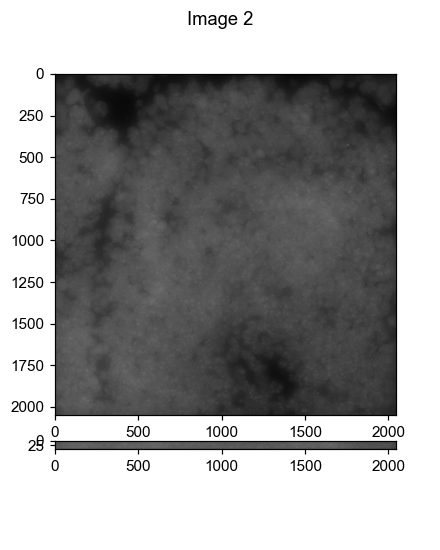

In [112]:
visual_tools.imshow_mark_3d_v2([before_fov.dapi_im, nim])

In [55]:
from ImageAnalysis3 import _image_size, _allowed_colors, _num_buffer_frames, _num_empty_frames, _correction_folder


In [97]:
fov.annotated_folders

['\\\\10.245.74.158\\Chromatin_NAS_5\\20201127-NOAcr_CTP-08_E14_brain_no_clearing\\After_clearing\\H0R0',
 '\\\\10.245.74.158\\Chromatin_NAS_5\\20201127-NOAcr_CTP-08_E14_brain_no_clearing\\After_clearing\\H1R1',
 '\\\\10.245.74.158\\Chromatin_NAS_5\\20201127-NOAcr_CTP-08_E14_brain_no_clearing\\After_clearing\\H2R2',
 '\\\\10.245.74.158\\Chromatin_NAS_5\\20201127-NOAcr_CTP-08_E14_brain_no_clearing\\After_clearing\\H3R3',
 '\\\\10.245.74.158\\Chromatin_NAS_5\\20201127-NOAcr_CTP-08_E14_brain_no_clearing\\After_clearing\\H4R4',
 '\\\\10.245.74.158\\Chromatin_NAS_5\\20201127-NOAcr_CTP-08_E14_brain_no_clearing\\After_clearing\\H5R5',
 '\\\\10.245.74.158\\Chromatin_NAS_5\\20201127-NOAcr_CTP-08_E14_brain_no_clearing\\After_clearing\\H6R6',
 '\\\\10.245.74.158\\Chromatin_NAS_5\\20201127-NOAcr_CTP-08_E14_brain_no_clearing\\After_clearing\\H7R7',
 '\\\\10.245.74.158\\Chromatin_NAS_5\\20201127-NOAcr_CTP-08_E14_brain_no_clearing\\After_clearing\\H8R8',
 '\\\\10.245.74.158\\Chromatin_NAS_5\\20201127

In [113]:
fov.correction_folder

'\\\\10.245.74.158\\Chromatin_NAS_0\\Corrections\\20201204-Corrections_3color_50'

In [103]:
## load bead image
def _load_bead_image(self, _bead_id,
                     _overwrite=False, _verbose=True):
    """Function to load bead image for fov class
    
    """

    if 'correct_fov_image' not in locals():
        from ImageAnalysis3.io_tools.load import correct_fov_image

    if isinstance(_bead_id, int) or isinstance(_bead_id, np.int):
        _ind = int(_bead_id)
    elif isinstance(_bead_id, str):
        for _i, _fd in enumerate(self.annotated_folders):
            if _bead_id in _fd:
                _ind = _i
                break
    _bead_filename = os.path.join(self.annotated_folders[_ind], self.fov_name)
    _bead_channel = self.channels[self.bead_channel_index]
    # load this beads image
    _bead_im = correct_fov_image(_bead_filename, 
                                [_bead_channel],
                                single_im_size=self.shared_parameters['single_im_size'],
                                all_channels=self.channels,
                                num_buffer_frames=self.shared_parameters['num_buffer_frames'],
                                num_empty_frames=self.shared_parameters['num_empty_frames'],
                                drift=None, calculate_drift=False,
                                ref_filename=None,
                                correction_folder=self.correction_folder,
                                warp_image=True,
                                illumination_corr=self.shared_parameters['corr_illumination'],
                                bleed_corr=False, 
                                chromatic_corr=False, 
                                z_shift_corr=self.shared_parameters['corr_Z_shift'],
                                verbose=_verbose,
                                )[0][0]

    return _bead_im

In [107]:
before_bead_im = _load_bead_image(before_fov, 0)

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20201127-NOAcr_CTP-08_E14_brain_no_clearing\Before_clearing\H0R0\Conv_zscan_06.dax
-- loading illumination correction profile from file:
	 488 illumination_correction_488_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_5\20201127-NOAcr_CTP-08_E14_brain_no_clearing\Before_clearing\H0R0\Conv_zscan_06.dax  in 14.062s
-- removing hot pixels for channels:['488'] in 9.014s
-- illumination correction for channels: 488, in 1.886s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 25.563s


In [105]:
after_bead_im = _load_bead_image(fov, 0)

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20201127-NOAcr_CTP-08_E14_brain_no_clearing\After_clearing\H0R0\Conv_zscan_06.dax
-- loading illumination correction profile from file:
	 488 illumination_correction_488_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_5\20201127-NOAcr_CTP-08_E14_brain_no_clearing\After_clearing\H0R0\Conv_zscan_06.dax  in 13.777s
-- removing hot pixels for channels:['488'] in 8.978s
-- illumination correction for channels: 488, in 1.885s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 25.233s


<IPython.core.display.Javascript object>


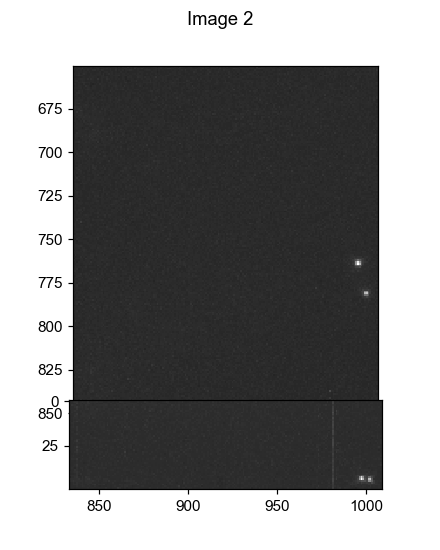

In [108]:
%matplotlib notebook
visual_tools.imshow_mark_3d_v2([before_bead_im, after_bead_im])

<IPython.core.display.Javascript object>


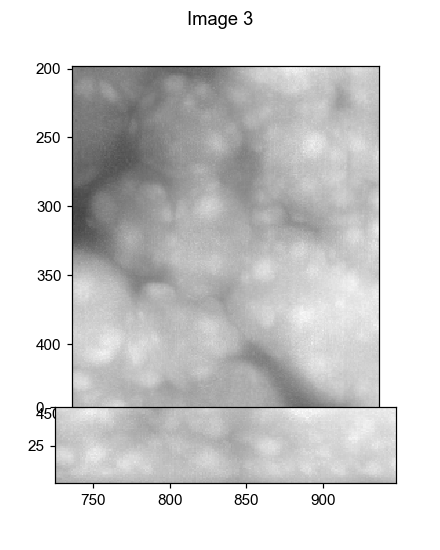

In [25]:
%matplotlib notebook
visual_tools.imshow_mark_3d_v2([before_fov.dapi_im, fov.dapi_im, nim])

In [ ]:
cross_correlation_align_single_image(before_fov.dapi_im)

In [67]:
calculate_translation(before_fov.dapi_im, fov.dapi_im, R )

(2, 2)


In [63]:
R[:1]

array([[ 0.99989683, -0.01436443]])

In [109]:
reload(correction_tools.alignment)
nim, M = correction_tools.alignment.generate_translation_from_DAPI(before_fov.dapi_im, fov.dapi_im,
                                                          R)

-- start calculating drift between DAPI images
-- start generating translated segmentation labels


In [68]:
correction_tools.alignment.cross_correlation_align_single_image(before_fov.dapi_im, nim, #fov.dapi_im,
                                                                single_im_size=fov.shared_parameters['single_im_size'])

-- aligning image -> directly use image
-- directly use ref_image


array([ -2.65, -10.18,  13.78])

In [126]:
reload(spot_tools)



<module 'ImageAnalysis3.spot_tools.translating' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\spot_tools\\translating.py'>

array([[ 12.65      , 964.04985403, 723.19776632]])

In [134]:
reload(spot_tools.translating)

fov.chrom_coords = spot_tools.translating.translate_spots(before_fov.chrom_coords, 
                                   rot, dft)

<IPython.core.display.Javascript object>


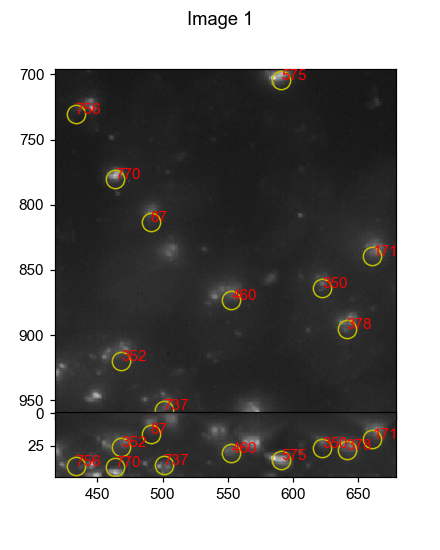

In [135]:
%matplotlib notebook
%matplotlib notebook
## visualize
coord_dict = {'coords':[np.flipud(_coord) for _coord in fov.chrom_coords],
              'class_ids':list(np.zeros(len(fov.chrom_coords),dtype=np.int)),
             }

visual_tools.imshow_mark_3d_v2([fov.chrom_im], 
                               given_dic=coord_dict,
                               save_file=None,
                               )

# find spots

In [170]:
fov.color_dic

{'H0R0': ['', '', '', 'beads', 'DAPI'],
 'H1R1': ['u41', 'u42', '', 'beads'],
 'H2R2': ['u66', 'u67', '', 'beads'],
 'H3R3': ['u69', 'u70', '', 'beads'],
 'H4R4': ['u72', 'u73', '', 'beads'],
 'H5R5': ['u75', 'u76', '', 'beads'],
 'H6R6': ['u78', 'u79', '', 'beads'],
 'H7R7': ['u81', 'u82', '', 'beads'],
 'H8R8': ['u99', 'u100', '', 'beads'],
 'H9R9': ['u102', 'u103', '', 'beads'],
 'H10R10': ['u105', 'u106', '', 'beads'],
 'H11R11': ['u108', 'u109', '', 'beads'],
 'H12R12': ['u111', 'u112', '', 'beads'],
 'H13R13': ['', 'reverse_chrom', '', 'beads']}

## select spots based on chromosomes

In [156]:
fov._load_from_file('unique')

+ loading unique from file: D:\Pu_Temp\20201127_IgH_P-brain\after_clearing\Conv_zscan_06.hdf5
++ finish loading unique in 0.050s. 


E:\Users\puzheng\Documents\ImageAnalysis3\classes\field_of_view.py:1413: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  _spots_list = np.array([_spots[_spots[:,0] > 0] for _flg, _spots in zip(_flags, _grp['spots'][:]) if _flg > 0])


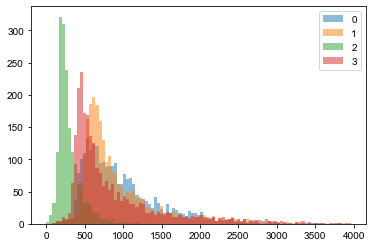

In [171]:
plt.figure()
for _reg_id in range(4):
    plt.hist(fov.unique_spots_list[_reg_id][:,0], bins=np.arange(0,4000,40), 
             label=f"{_reg_id}", alpha=0.5)
plt.legend()
plt.show()

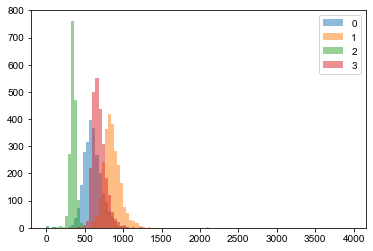

In [172]:
plt.figure()
for _reg_id in range(4):
    plt.hist(fov.unique_spots_list[_reg_id][:,4], bins=np.arange(0,4000,40), 
             label=f"{_reg_id}", alpha=0.5)
plt.legend()
plt.show()

In [146]:
intensity_th = 0.25
from ImageAnalysis3.spot_tools.picking import assign_spots_to_chromosomes

kept_spots_list = []
for _spots in fov.unique_spots_list:
    kept_spots_list.append(_spots[_spots[:,0] > intensity_th])
# finalize candidate spots
cand_chr_spots_list = [[] for _ct in fov.chrom_coords]
for _spots in kept_spots_list:
    _cands_list = assign_spots_to_chromosomes(_spots, fov.chrom_coords)
    for _i, _cands in enumerate(_cands_list):
        cand_chr_spots_list[_i].append(_cands)
print(f"kept chromosomes: {len(fov.chrom_coords)}")

kept chromosomes: 778


In [147]:
reload(spot_tools.picking)
from ImageAnalysis3.spot_tools.picking import convert_spots_to_hzxys

dna_cand_hzxys_list = [convert_spots_to_hzxys(_spots, fov.shared_parameters['distance_zxy'])
                       for _spots in cand_chr_spots_list]
dna_reg_ids = fov.unique_ids

In [148]:
# select_hzxys close to the chromosome center
dist_th = 3000 # upper limit is 5000nm
sel_dna_cand_hzxys_list = []
for _cand_hzxys, _chrom_coord in zip(dna_cand_hzxys_list, fov.chrom_coords):
    _sel_cands_list = []
    
    for _cands in _cand_hzxys:
        if len(_cands) == 0:
            _sel_cands_list.append([])
        else:
            _dists = np.linalg.norm(_cands[:,1:4] - _chrom_coord*np.array([200,108,108]), axis=1)
            _sel_cands_list.append(_cands[_dists < dist_th])
            
    # append
    sel_dna_cand_hzxys_list.append(_sel_cands_list)

- iter:0
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 4.063s
-- collapse all regions into 1d.


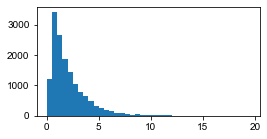

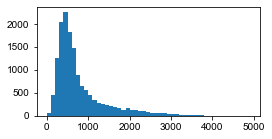

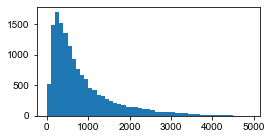

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 4.185s
-- region kept: 0.8028
- iter:1
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 3.920s
-- collapse all regions into 1d.


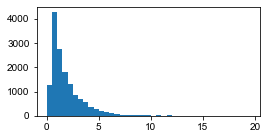

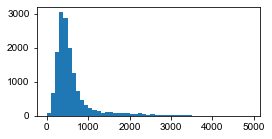

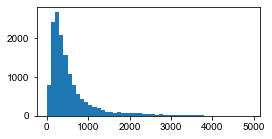

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 4.046s
-- region kept: 0.8958
- iter:2
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 3.828s
-- collapse all regions into 1d.


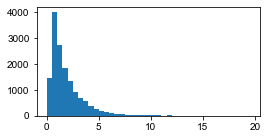

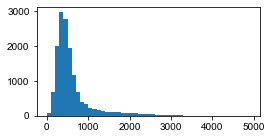

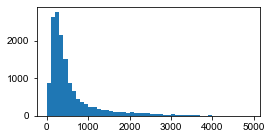

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 4.006s
-- region kept: 0.9143
- iter:3
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 3.832s
-- collapse all regions into 1d.


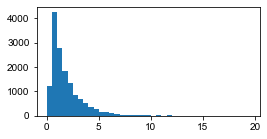

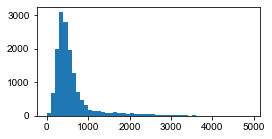

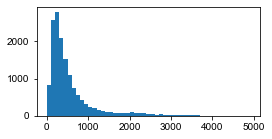

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 3.953s
-- region kept: 0.9547
- iter:4
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 3.844s
-- collapse all regions into 1d.


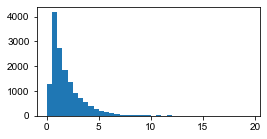

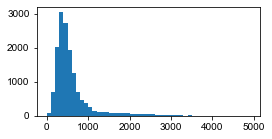

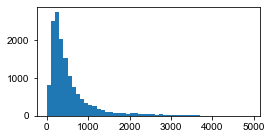

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 4.047s
-- region kept: 0.9122
- iter:5
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 3.844s
-- collapse all regions into 1d.


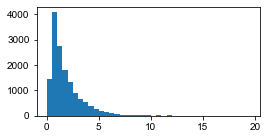

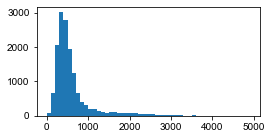

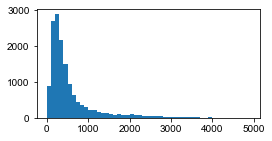

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 3.925s
-- region kept: 0.9232
- iter:6
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 3.937s
-- collapse all regions into 1d.


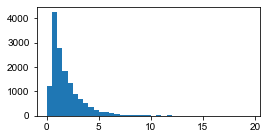

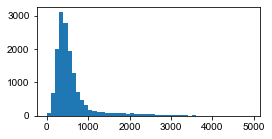

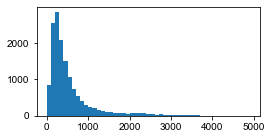

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 3.960s
-- region kept: 0.9607
- iter:7
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 3.926s
-- collapse all regions into 1d.


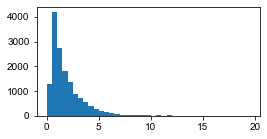

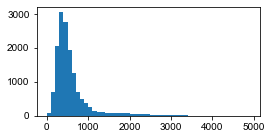

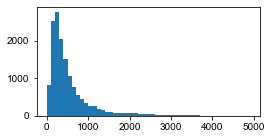

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 4.172s
-- region kept: 0.9144
- iter:8
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 3.922s
-- collapse all regions into 1d.


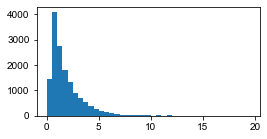

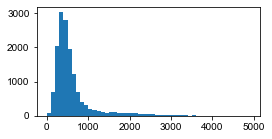

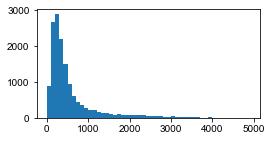

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 4.064s
-- region kept: 0.9246
- iter:9
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 3.972s
-- collapse all regions into 1d.


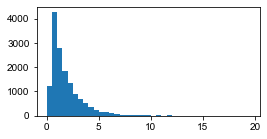

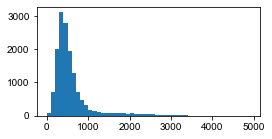

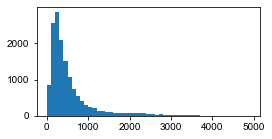

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 4.155s
-- region kept: 0.9614


In [149]:
reload(ia.spot_tools.picking)
# load functions
from ImageAnalysis3.spot_tools.picking import Pick_spots_by_intensity, EM_pick_scores_in_population, generate_reference_from_population,evaluate_differences

%matplotlib inline
niter= 10
nkeep = len(sel_dna_cand_hzxys_list)
num_threads = 12
# initialize
init_dna_hzxys = Pick_spots_by_intensity(sel_dna_cand_hzxys_list[:nkeep])
# set save list
sel_dna_hzxys_list, sel_dna_scores_list, all_dna_scores_list = [init_dna_hzxys], [], []
for _iter in range(niter):
    print(f"- iter:{_iter}")
    # generate reference
    ref_ct_dists, ref_local_dists, ref_ints = generate_reference_from_population(
        sel_dna_hzxys_list[-1], dna_reg_ids, 
        sel_dna_hzxys_list[-1][:nkeep], dna_reg_ids,
        num_threads=num_threads,
        collapse_regions=True,
    )
    plt.figure(figsize=(4,2))
    plt.hist(np.ravel(ref_ints), bins=np.arange(0,20,0.5))
    plt.figure(figsize=(4,2))
    plt.hist(np.ravel(ref_ct_dists), bins=np.arange(0,5000,100))
    plt.figure(figsize=(4,2))
    plt.hist(np.ravel(ref_local_dists), bins=np.arange(0,5000,100))
    plt.show()
    # scoring
    sel_hzxys, sel_scores, all_scores = EM_pick_scores_in_population(
            sel_dna_cand_hzxys_list[:nkeep], dna_reg_ids, sel_dna_hzxys_list[-1], 
            ref_ct_dists, ref_local_dists, ref_ints,
            sel_dna_hzxys_list[-1], dna_reg_ids, num_threads=num_threads,
        )
    update_rate = evaluate_differences(sel_hzxys, sel_dna_hzxys_list[-1])
    print(f"-- region kept: {update_rate:.4f}")
    sel_dna_hzxys_list.append(sel_hzxys)
    sel_dna_scores_list.append(sel_scores)
    all_dna_scores_list.append(all_scores)
    
    if update_rate > 0.99:
        break

In [150]:
from scipy.spatial.distance import pdist, squareform
sel_iter = -1

final_dna_hzxys_list = []
distmap_list = []
score_th = np.exp(-6)
bad_spot_percentage = 0.6
for _hzxys, _scores in zip(sel_dna_hzxys_list[sel_iter], sel_dna_scores_list[sel_iter]):
    _kept_hzxys = np.array(_hzxys).copy()
    _kept_hzxys[_scores < score_th] = np.nan
    if np.mean(np.isnan(_kept_hzxys).sum(1)>0)<bad_spot_percentage:
        final_dna_hzxys_list.append(_kept_hzxys)
        distmap_list.append(squareform(pdist(_kept_hzxys[:,1:4])))

distmap_list = np.array(distmap_list)
median_distmap = np.nanmedian(distmap_list, axis=0)

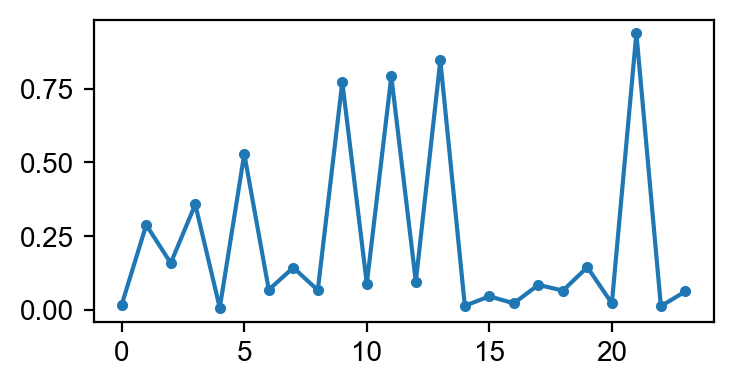

In [151]:
loss_rates = np.mean(np.sum(np.isnan(final_dna_hzxys_list), axis=2)>0, axis=0)
fig, ax = plt.subplots(figsize=(4,2),dpi=200)
ax.plot(loss_rates, '.-')
#ax.set_xticks(np.arange(0,150,20))
plt.show()

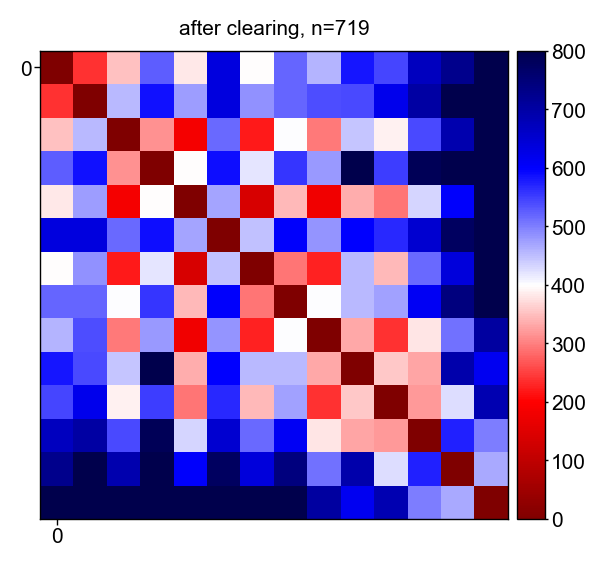

In [152]:
fig, ax = plt.subplots(figsize=(4,3),dpi=200)
ax = ia.figure_tools.distmap.plot_distance_map(#median_distmap,
                                               median_distmap[:14,:14], 
                                               color_limits=[0,800],
                                               ax=ax,
                                               ticks=np.arange(0,150,20), 
                                               figure_dpi=200)
ax.set_title(f"after clearing, n={len(distmap_list)}", fontsize=7.5)
plt.gcf().subplots_adjust(bottom=0.1)
plt.show()